In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
from gstools import SRF, Gaussian,CovModel
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [3]:
class GWR_gau(CovModel):
    def correlation(self,r):
        return np.exp(-0.5*(r/self.len_scale)**2)

In [4]:
size=40
model = GWR_gau(dim=2, var=1,len_scale=6)
srf = SRF(model,mean=0,seed=555)
b0 = srf.structured([range(size),range(size)]).reshape(-1)
b0 = (b0 - b0.mean())/b0.std() + 2

In [5]:
size=40
model = GWR_gau(dim=2, var=1,len_scale=12)
srf = SRF(model,mean=0,seed=888)
b1 = srf.structured([range(size),range(size)]).reshape(-1)
b1 = (b1 - b1.mean())/b1.std() + 2

In [6]:
b2 = np.ones(size*size).reshape(-1)*2

In [7]:
def plot_1(b,title='',vmin=None,vmax=None):
    plt.imshow(b.reshape(size,size),cmap=plt.cm.get_cmap('viridis',8),vmin=vmin,vmax=vmax)
    plt.title(title)
    plt.colorbar()
    
def plot_s(b,sub_title=['','','',''],vmin=None,vmax=None):
    k = len(b)
    fig, axs = plt.subplots(1, k,figsize=(6*k,4))
    for i in range(k):
        if i == 0:
            ax = axs[i].imshow(b[i].reshape(size,size),
                               cmap=plt.cm.get_cmap('viridis',21),vmin=vmin,vmax=vmax)
        else:
            ax = axs[i].imshow(b[i].reshape(size,size),cmap=plt.cm.get_cmap('viridis',21),vmin=vmin,vmax=vmax)
        axs[i].set_title(sub_title[i],fontsize=16)
        fig.colorbar(ax, ax=axs[i])

        axs[i].set_xticks(np.arange(-0.5, 40, 5))
        axs[i].set_yticks(np.arange(-0.5, 40, 5))
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
        axs[i].tick_params(axis='x', colors=(0,0,0,0))
        axs[i].tick_params(axis='y', colors=(0,0,0,0))
        
        #axs[i].grid(color='black', linewidth=1)
        

    #fig.suptitle(title, fontsize=16)

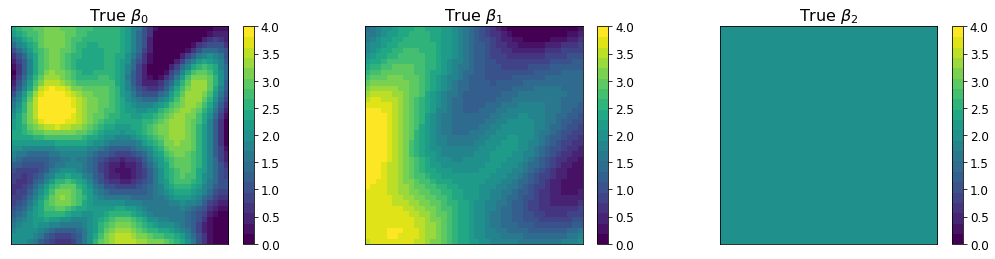

In [8]:
plot_s(np.vstack([b0,b1,b2]),[r"True $\beta_0$",r"True $\beta_1$",r"True $\beta_2$"],vmin=0,vmax=4)

In [9]:
true = pd.DataFrame(np.array([b0,b1,b2]).T)

In [10]:
np.random.seed(222)
X1 = np.random.randn(size*size)*1
X2 = np.random.randn(size*size)*1
X3 = np.random.randn(size*size)*1

X = np.vstack([X1,X2]).T
u = np.array([np.linspace(0,size-1,num=size)]*size).reshape(-1)
v = np.array([np.linspace(0,size-1,num=size)]*size).T.reshape(-1)
coords = list(zip(u,v))

k = X.shape[1];n = X.shape[0]

In [11]:
f0 = b0
f1 = b1*X1
f2 = b2*X2

In [12]:
sem_knn_mc = pd.read_csv("sem_knn_mc_results.csv",index_col=0)
sem_queen_mc = pd.read_csv("sem_queen_mc_results.csv",index_col=0)
mgwr_mc = pd.read_csv("mgwr_mc_results.csv",index_col=0)

In [13]:
mlm_4_mc = pd.read_csv("MLM/mlm_4_mc.csv")
mlm_8_mc = pd.read_csv("MLM/mlm_8_mc.csv")
mlm_residual = pd.read_csv("MLM/mlm_res_mc_results.csv")

In [14]:
mc_results = pd.concat([sem_knn_mc,sem_queen_mc,mgwr_mc,mlm_4_mc,mlm_8_mc,mlm_residual],axis=1)

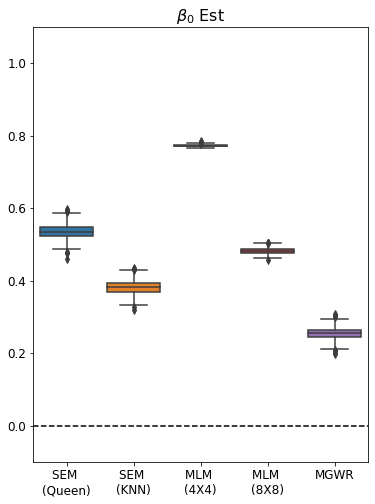

In [15]:
fig, ax = plt.subplots(1, 1,figsize=(6,8))
plt.title(r"$\beta_0$ Est",fontsize=16)

mc = mc_results[['semq_b0_est','semk_b0_est','mlm_4_b0', 'mlm_8_b0', 'mgwr_b0_est']]
mc.columns = ['SEM \n(Queen)', 'SEM \n(KNN)', "MLM \n(4X4)", "MLM \n(8X8)", 'MGWR']
df_melt = pd.melt(mc)
df_melt.columns = ['Model','Value']

sns.boxplot(x="Model", y="Value", data=df_melt,ax=ax)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_ylim(-0.1,1.1)
plt.axhline(y=0.0, color='black', linestyle='--')

plt.savefig('MC_results_b0.png',dpi=300)

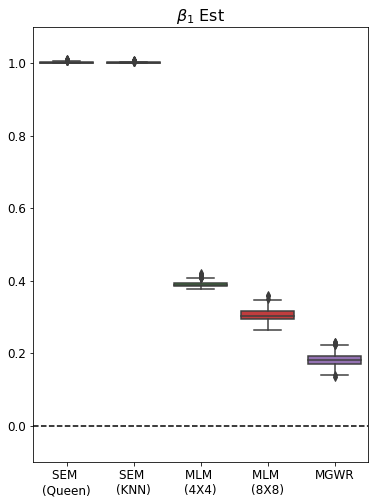

In [16]:
fig, ax = plt.subplots(1, 1,figsize=(6,8))
plt.title(r"$\beta_1$ Est",fontsize=16)

mc = mc_results[['semq_b1_est','semk_b1_est','mlm_4_b1', 'mlm_8_b1', 'mgwr_b1_est']]
mc.columns = ['SEM \n(Queen)', 'SEM \n(KNN)', "MLM \n(4X4)", "MLM \n(8X8)", 'MGWR']
df_melt = pd.melt(mc)
df_melt.columns = ['Model','Value']

sns.boxplot(x="Model", y="Value", data=df_melt,ax=ax)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_ylim(-0.1,1.1)
plt.axhline(y=0.0, color='black', linestyle='--')

plt.savefig('MC_results_b1.png',dpi=300)

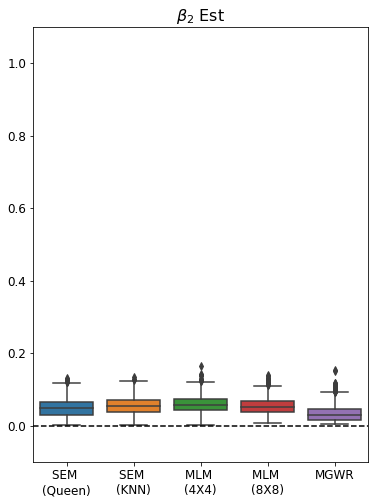

In [17]:
fig, ax = plt.subplots(1, 1,figsize=(6,8))
plt.title(r"$\beta_2$ Est",fontsize=16)

mc = mc_results[['semq_b2_est','semk_b2_est','mlm_4_b2', 'mlm_8_b2', 'mgwr_b2_est']]
mc.columns = ['SEM \n(Queen)', 'SEM \n(KNN)', "MLM \n(4X4)", "MLM \n(8X8)", 'MGWR']
df_melt = pd.melt(mc)
df_melt.columns = ['Model','Value']

sns.boxplot(x="Model", y="Value", data=df_melt,ax=ax)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_ylim(-0.1,1.1)
plt.axhline(y=0.0, color='black', linestyle='--')

plt.savefig('MC_results_b2.png',dpi=300)

In [18]:
mlm_residual.shape

(1000, 3)

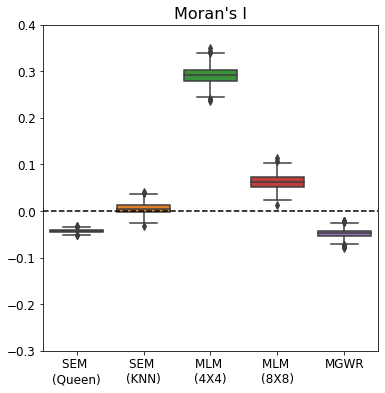

In [19]:
fig, ax = plt.subplots(1, 1,figsize=(6,6))
plt.title("Moran's I",fontsize=16)

mc = mc_results[['semq_moran','semk_moran','mlm_4_res','mlm_8_res','mgwr_moran']]
mc.columns = ['SEM \n(Queen)', 'SEM \n(KNN)', "MLM \n(4X4)", "MLM \n(8X8)", 'MGWR']
df_melt = pd.melt(mc)
df_melt.columns = ['Model','Value']

sns.boxplot(x="Model", y="Value", data=df_melt,ax=ax)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.axhline(y=0.0, color='black', linestyle='--')

ax.set_ylim(-0.3,0.4)

plt.savefig('MC_results_moran.png',dpi=300)